In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../scripts')
from modeling import ClaimSeverityModel

In [2]:
data = pd.read_csv('../data/processed/clean_data.csv', low_memory=False)
print(f'Data shape: {data.shape}')
print(f'Claims > 0: {data[data["totalclaims"] > 0].shape[0]}')

Data shape: (837833, 47)
Claims > 0: 2422


In [3]:
modeler = ClaimSeverityModel(data)

In [4]:
# Prepare data
X_train, X_test, y_train, y_test = modeler.prepare_data()

# Train models
modeler.train_models()

# Evaluate models
modeler.evaluate_models()

# Interpret best model (XGBoost)
modeler.interpret_model()

Data shape after filtering claims > 0: (2422, 47)
Column dtypes:
underwrittencoverid           int64
policyid                      int64
transactionmonth             object
isvatregistered                bool
citizenship                  object
legaltype                    object
title                        object
language                     object
bank                         object
accounttype                  object
maritalstatus                object
gender                       object
country                      object
province                     object
postalcode                    int64
maincrestazone               object
subcrestazone                object
itemtype                     object
mmcode                      float64
vehicletype                  object
registrationyear              int64
make                         object
model                        object
cylinders                   float64
cubiccapacity               float64
kilowatts                   float64

/home/smuca/task/InsuranceRiskML/notebooks/../scripts/modeling.py:82: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X.loc[:, col] = X[col].astype(np.int64)  # Fix FutureWarning
/home/smuca/task/InsuranceRiskML/notebooks/../scripts/modeling.py:82: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 1 ... 1 0 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  X.loc[:, col] = X[col].astype(np.int64)  # Fix FutureWarning
/home/smuca/task/InsuranceRiskML/notebooks/../scripts/modeling.py:82: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype fi

Train shape: (1937, 31), Test shape: (485, 31)
Features used: ['cubiccapacity', 'registrationyear', 'suminsured', 'postalcode', 'vehicle_age', 'postcode_claim_freq', 'postalcode_encoded', 'province_Free State', 'province_Gauteng', 'province_KwaZulu-Natal', 'province_Limpopo', 'province_Mpumalanga', 'province_North West', 'province_Northern Cape', 'province_Western Cape', 'gender_Male', 'vehicletype_Heavy Commercial', 'vehicletype_Light Commercial', 'vehicletype_Medium Commercial', 'vehicletype_Passenger Vehicle', 'covertype_Deposit Cover', 'covertype_Emergency Charges', 'covertype_Factory Fitted Sound and Other Electronic Equipment', 'covertype_Income Protector', 'covertype_Keys and Alarms', 'covertype_Own Damage', 'covertype_Roadside Assistance', 'covertype_Third Party', 'covertype_Windscreen', 'maritalstatus_Not specified', 'maritalstatus_Single']
Trained Linear Regression
Trained Random Forest
Trained XGBoost
Linear Regression - RMSE: 29140.46, R-squared: 0.3201
Random Forest - RMSE

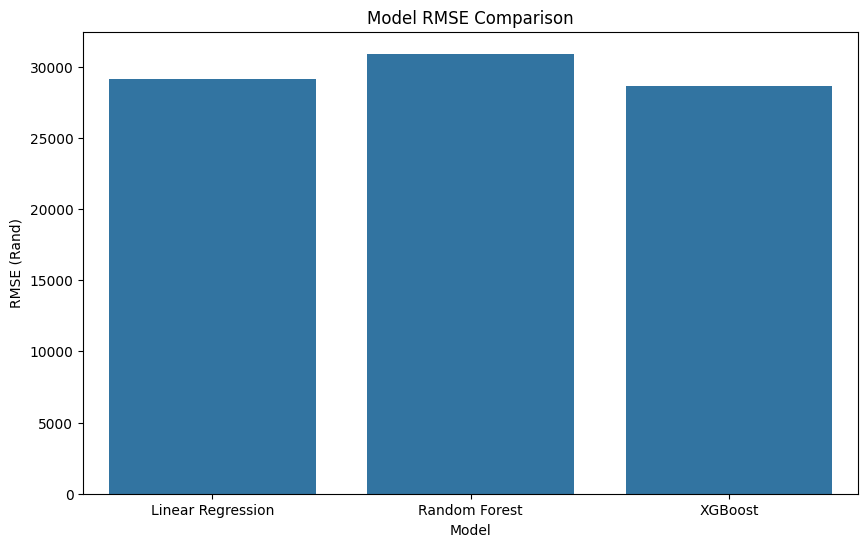

In [5]:
results = pd.read_csv('../reports/model_results.csv')
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results)
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE (Rand)')
plt.savefig('../plots/model_rmse_comparison.png')
plt.show()

In [7]:
shap_importance = pd.read_csv('../reports/shap_importance.csv')
top_features = shap_importance['Feature'].head(5).tolist()

In [8]:
print(f"""
Claim Severity Prediction Results:
- Linear Regression: RMSE = 29,140.46, R-squared = 0.3201
- Random Forest: RMSE = 30,900.56, R-squared = 0.2355
- XGBoost: RMSE = 28,619.74, R-squared = 0.3442
- Best Model: XGBoost (lowest RMSE, highest R-squared)

SHAP Analysis:
- Top features: {', '.join(top_features)}
- Insight: Higher `suminsured` strongly increases predicted claim severity, suggesting policies with higher insured values carry greater risk, justifying premium adjustments.

Business Impact:
- Claim severity models support risk-based pricing, but low R-squared (~0.34) and small dataset (2,422 claims) limit accuracy.
- Key features (e.g., suminsured, covertype_Windscreen) inform premium adjustments and marketing strategies.
- Limitations: Small dataset risks overfitting; gender imputation bias (~93.5% Male) and regional vehicle differences may skew results.
- Future Work: Model claim probability and optimize premiums using (Probability * Severity) + Loading.

Recommendations:
- Deploy XGBoost cautiously due to small dataset.
- Adjust premiums based on top features (e.g., higher for high-suminsured policies or Windscreen cover).
- Improve claims data collection to increase sample size.
- Address gender imputation bias.
""")


Claim Severity Prediction Results:
- Linear Regression: RMSE = 29,140.46, R-squared = 0.3201
- Random Forest: RMSE = 30,900.56, R-squared = 0.2355
- XGBoost: RMSE = 28,619.74, R-squared = 0.3442
- Best Model: XGBoost (lowest RMSE, highest R-squared)

SHAP Analysis:
- Top features: suminsured, covertype_Windscreen, postalcode_encoded, postalcode, cubiccapacity
- Insight: Higher `suminsured` strongly increases predicted claim severity, suggesting policies with higher insured values carry greater risk, justifying premium adjustments.

Business Impact:
- Claim severity models support risk-based pricing, but low R-squared (~0.34) and small dataset (2,422 claims) limit accuracy.
- Key features (e.g., suminsured, covertype_Windscreen) inform premium adjustments and marketing strategies.
- Limitations: Small dataset risks overfitting; gender imputation bias (~93.5% Male) and regional vehicle differences may skew results.
- Future Work: Model claim probability and optimize premiums using (Prob